## ΒΗΜΑ 1ο - Προπαρασκευή δεδομένων (Data Preprocessing)

### α) Καθαρίζω τα δεδομένα από ελλιπείς και ακραίες τιμές

- **α.1) Ελλιπείς δεδομένα**  

- **α.2) Διπλότυοπα δεδομένα** 
 
- **α.3) Ακραίες τιμές**  
  
### β) Κανονικοποιώ - Διακριτοποιώ τα δεδομένα
- **Κανονικοποίηση** (Normalization):  
### γ)Κωδικοποιώ τα κατηγορικά δεδομένα
- **Μέθοδοι** (Label encoding-Ordinal encoding-One hot encoding)
### δ)Κάνω ανάλυση συσχετίσεων των δεδομένων με στόχο την μείωση του όγκου τους 
----------------------------------------------------------------------------------------------------------------------------------


## Βιβλιοθήκες

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Διαβάζουμε το dataset

In [2]:
full_dataset = pd.read_csv("../CSV_files/data.csv")
full_dataset = full_dataset.sample(frac=1, random_state=42).reset_index(drop=True)


## ΒΗΜΑ 1.α.1 - Ελέγχουμε για το αν υπάρχουν ελλιπείς τιμές στα δεδομένα

In [3]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

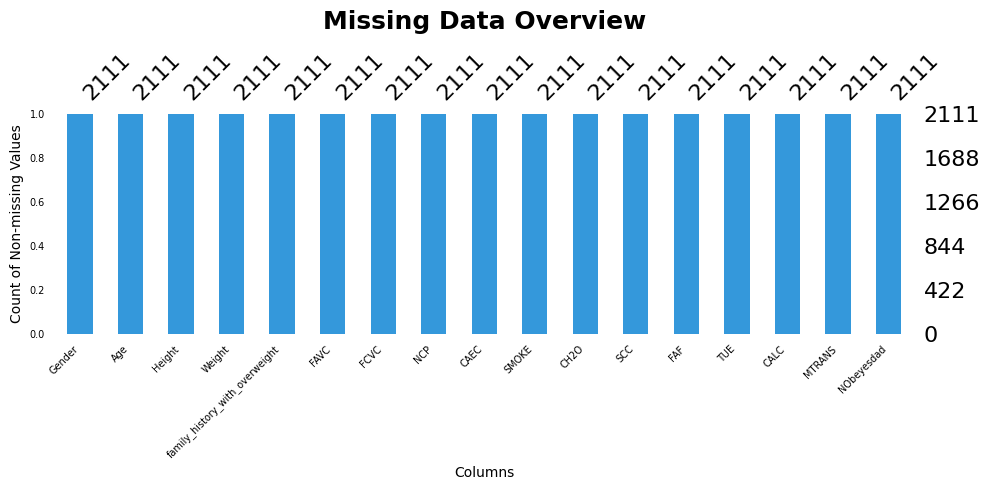

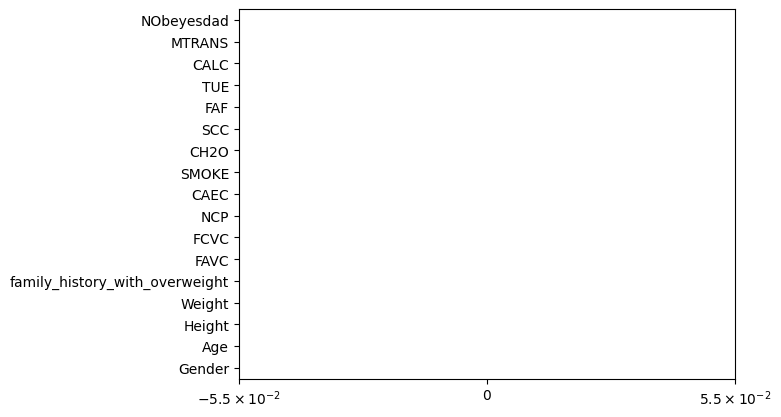

In [4]:
#ΠΡΩΤΑ ΘΑ ΨΑΞΟΥΜΕ ΓΙΑ ΕΛΛΙΠΕΙΣ ΤΙΜΕΣ ΣΤΑ ΔΕΔΟΜΕΝΑ ΜΑΣ 
#ΣΕ ΑΥΤΟ ΤΟ ΣΗΜΕΙΟ ΘΑ ΔΗΜΙΟΥΡΓΗΣΟΥΜΕ ΕΝΑ ΓΡΑΦΗΜΑ ΠΟΥ ΘΑ ΠΡΟΒΑΛΕΙ ΓΙΑ ΚΑΘΕ ΣΤΗΛΗ ΞΕΧΩΡΙΣΤΑ ΤΑ non-null values
fig, ax = plt.subplots(1, 1, figsize=(10, 5))    
msno.bar(full_dataset, ax=ax, color="#3498db")
ax.set_title("Missing Data Overview", fontsize=18, fontweight="bold", pad=15)
ax.set_xlabel("Columns", fontsize=10)        
ax.set_ylabel("Count of Non-missing Values", fontsize=10)
ax.tick_params(axis="both", which="major", labelsize=7) 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()
#ΣΕ ΑΥΤΟ ΤΟ ΣΗΜΕΙΟ ΘΑ ΔΗΜΙΟΥΡΓΗΣΟΥΜΕ ΕΝΑ ΓΡΑΦΗΜΑ ΠΟΥ ΘΑ ΠΡΟΒΑΛΕΙ ΓΙΑ ΚΑΘΕ ΣΤΗΛΗ ΞΕΧΩΡΙΣΤΑ ΤΑ null values
fig, ax = plt.subplots(1, 1)
full_dataset.isna().sum().plot.barh(ax=ax)
ax.set_xscale("symlog")
plt.show()


#ΑΠΟ ΤΟΝ ΣΥΝΔΙΑΣΜΟ ΤΩΝ ΔΥΟ ΑΥΤΩΝ ΓΡΑΦΗΜΑΤΩΝ ΚΑΤΑΛΙΓΟΥΜΕ ΣΤΑ ΣΥΜΠΕΡΑΣΜΑΤΑ ΠΟΥ ΘΕΛΟΥΜΕ

Καταλήγουμε στο συμπέρασμα ότι δεν υπάρχουν ελλιπείς τιμές στα δεδομένα μας

## ΒΗΜΑ 1.α.2 - Ελέγχουμε για το αν υπάρχουν διπλότυοπα δεδομένα

#### Διαγράφουμε τις εγγραφές που υπάρχουν στο dataset πάνω από μία φορά το οποίο είναι 24 εγγραφές(1,13% του dataset)

In [5]:
duplicate_rows = full_dataset.duplicated().sum()
if duplicate_rows>0:
    full_dataset=full_dataset.drop_duplicates()

In [6]:
len(full_dataset)

2087

## ΒΗΜΑ 1.α.3 - Ελέγχουμε για ακραίες τιμές

In [7]:
continuous_vars = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']


for col in continuous_vars:
    Q1 = full_dataset[col].quantile(0.25)
    Q3 = full_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = full_dataset[(full_dataset[col] < lower) | (full_dataset[col] > upper)]
    
    print(f"{col}: {len(outliers)} ακραίες τιμές")

Age: 167 ακραίες τιμές
Height: 1 ακραίες τιμές
Weight: 1 ακραίες τιμές
NCP: 577 ακραίες τιμές
CH2O: 0 ακραίες τιμές
FAF: 0 ακραίες τιμές
TUE: 0 ακραίες τιμές


##### Παρατηρούμε ότι η κύρια πηγή ακραίων τιμών είναι τα χαρακτηριστικά Age και NCP

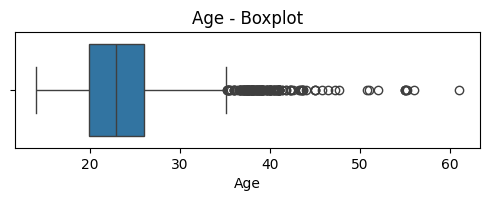

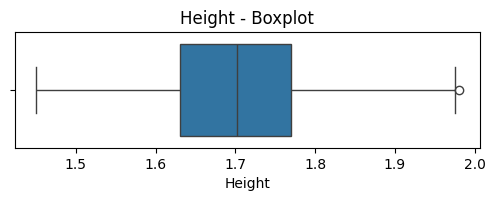

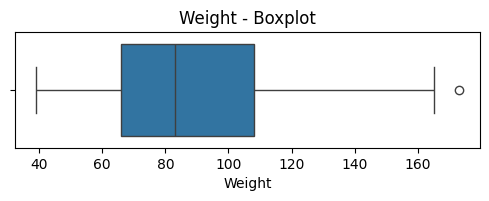

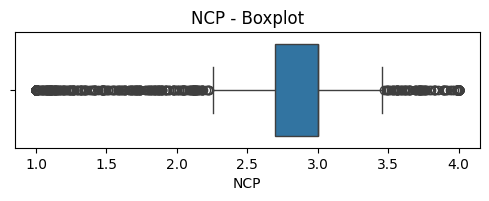

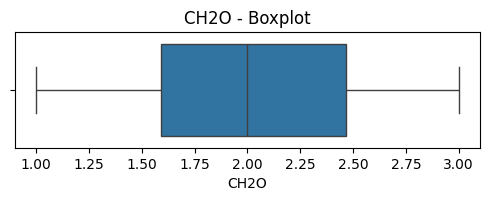

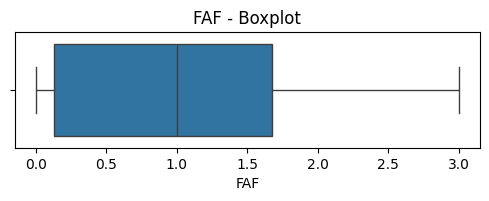

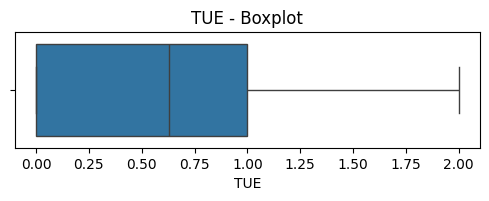

In [8]:
for col in continuous_vars:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=full_dataset[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

In [9]:
continuous_vars = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']


for col in continuous_vars:
    Q1 = full_dataset[col].quantile(0.25)
    Q3 = full_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = full_dataset[(full_dataset[col] < lower) | (full_dataset[col] > upper)]
    
    print(f"\n Outliers στη μεταβλητή: {col} ({len(outliers)} εγγραφές)")
    print(outliers)



 Outliers στη μεταβλητή: Age (167 εγγραφές)
      Gender        Age    Height      Weight family_history_with_overweight  \
31    Female  35.194089  1.673482   73.193589                            yes   
56      Male  40.106145  1.760175  117.651046                            yes   
70    Female  38.378056  1.678050   77.224574                            yes   
71    Female  37.000000  1.680000   83.000000                            yes   
82      Male  39.825592  1.706741  108.012603                            yes   
...      ...        ...       ...         ...                            ...   
2083  Female  43.510672  1.587546   76.126112                            yes   
2093  Female  52.000000  1.690000   87.000000                            yes   
2097  Female  43.604901  1.569234   81.827288                            yes   
2098    Male  37.186795  1.704877  107.947470                            yes   
2102  Female  37.872971  1.565366   80.000000                            ye

#### Παρατηρούμε ότι σε κάποια χαρακτηριστικά είναι  αυστηρό το κριτήριο με το οποίο θεωρούνται outliers συνεπώς αφού τα feautures διαφέρουν τόσο πολύ μεταξύ τους για κάθε μεταβλητή θα χρησιμοποιηθεί διαφορετικό iqr factor

In [10]:
iqr_factors = {
    'Age': 2.5,
    'Height': 2.0,
    'Weight': 1.8,
    'NCP': 3.5,
    'CH2O': 1.5,
    'FAF': 1.5,
    'TUE': 2.5,
}

In [11]:
for col in continuous_vars:
    factor = iqr_factors.get(col, 1.5)
    Q1 = full_dataset[col].quantile(0.25)
    Q3 = full_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    outliers = full_dataset[(full_dataset[col] < lower) | (full_dataset[col] > upper)]
    print(f"{col} -> Outliers: {len(outliers)}")
    
    full_dataset = full_dataset[(full_dataset[col] >= lower) & (full_dataset[col] <= upper)]

Age -> Outliers: 34
Height -> Outliers: 0
Weight -> Outliers: 0
NCP -> Outliers: 306
CH2O -> Outliers: 0
FAF -> Outliers: 0
TUE -> Outliers: 0


In [12]:
len(full_dataset)

1747

#### Συνεπώς μετά την διαγραφή των ακραίων τιμών το dataset περιέχει 1747 εγγραφές το οποίο συνεπάγεται με μείωση του μεγέθους του dataset ίση με 16.291%

## ΒΗΜΑ 2.α - Χωρίζουμε το dataset σε train ,validation και  test dataset

### Ο στόχος της εργασίας είναι η πρόβλεψη για το NObeyesdad οπότε πρέπει να το χωρίσουμε από το υπόλοιπο dataset(η εντολή διαφυλάζει την τυχαιότητα της κατανομής των δεδομένων)

In [13]:
X = full_dataset.drop("NObeyesdad", axis=1)
y = full_dataset["NObeyesdad"]

In [14]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

train datatet ->70%(1222 εγγραφές)

validation datatet ->10%(175 εγγραφές)

test datatet ->20%(350 εγγραφές)

### Επιλέγουμε ποιά δεδομένα θα κανονικοποιήσουμε 

In [15]:
X_train_before_stand=X_train.copy()
X_val_before_stand=X_val.copy()
X_test_before_stand=X_test.copy()


Ξεχωρίζουμε αριθμητικά και κατηγορικά χαρακτηριστικά 

In [16]:
numerical_features=full_dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features=full_dataset.select_dtypes(include=['object']).columns.tolist()

In [17]:
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()


X_train_scaled[numerical_features]=scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features]=scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features]=scaler.transform(X_test[numerical_features])

## ΒΗΜΑ 1.γ-Κωδικοποίηση δεδομένων

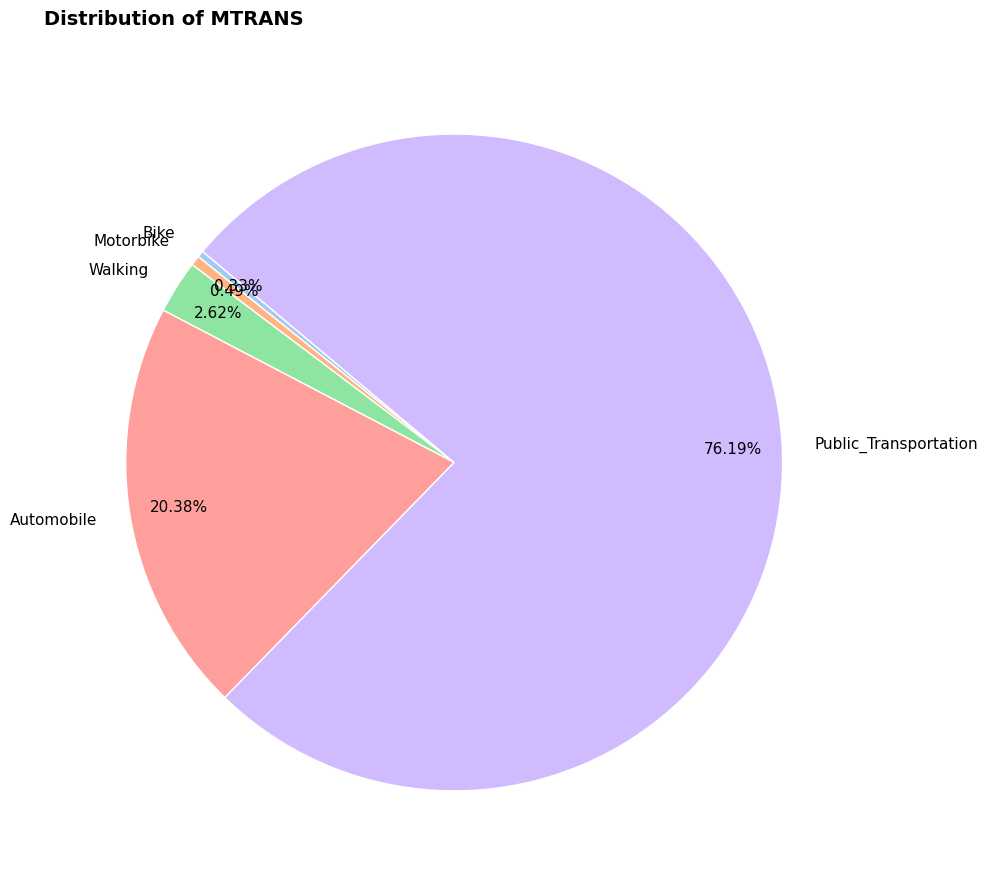

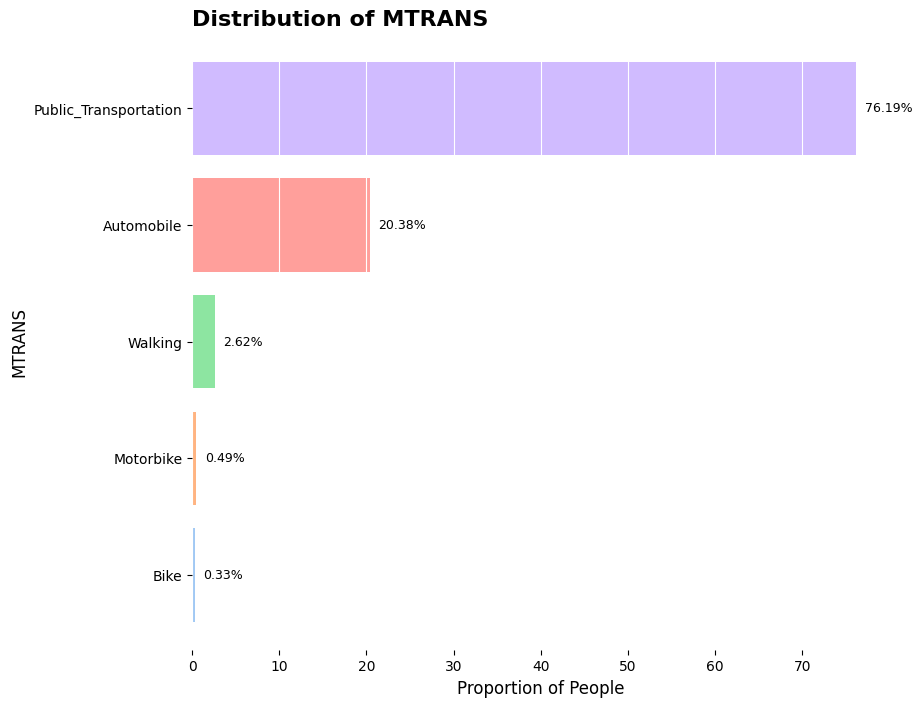

In [18]:

out = X_train_scaled["MTRANS"].value_counts(normalize=True).sort_values()

fig, ax = plt.subplots(figsize=(10, 10))

colors = sns.color_palette("pastel", len(out))


ax.pie(
        out,
        labels=out.index,
        autopct="%1.2f%%",
        startangle=140,
        colors=colors,
        wedgeprops={"edgecolor": "white"},
        pctdistance=0.85,
        textprops={"fontsize": 11},
    )


ax.set_title(
        "Distribution of MTRANS",
        fontsize=14,
        fontweight="bold",
        loc="left",
        pad=20,
)
    

plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(9, 8))


bars = ax.barh(out.index, out.values * 100, color=colors)


ax.set_xlabel("Proportion of People", fontsize=12)
ax.set_ylabel("MTRANS", fontsize=12)
ax.set_title(
        "Distribution of MTRANS",
        fontsize=16,
        fontweight="bold",
        loc="left",
)

for bar in bars:
        ax.text(
            bar.get_width() + 1, 
            bar.get_y() + bar.get_height() / 2,  
            f"{bar.get_width():.2f}%",  
            va="center",
            fontsize=9,
        )

plt.grid(axis="x", alpha=1, color="white")
sns.despine(left=True, bottom=True)
plt.show()

### Τώρα προχωράμε στο στάδιο της κωδικοποίησης των κατηγορικών δεδομένων

In [19]:
for feature in X_train_scaled.select_dtypes(include=['object', 'category']).columns:
    print(f"Description for {feature}:")
    print(X_train_scaled[feature].describe())
    print("\n")


Description for Gender:
count     1222
unique       2
top       Male
freq       641
Name: Gender, dtype: object


Description for family_history_with_overweight:
count     1222
unique       2
top        yes
freq      1028
Name: family_history_with_overweight, dtype: object


Description for FAVC:
count     1222
unique       2
top        yes
freq      1077
Name: FAVC, dtype: object


Description for CAEC:
count          1222
unique            4
top       Sometimes
freq           1047
Name: CAEC, dtype: object


Description for SMOKE:
count     1222
unique       2
top         no
freq      1199
Name: SMOKE, dtype: object


Description for SCC:
count     1222
unique       2
top         no
freq      1162
Name: SCC, dtype: object


Description for CALC:
count          1222
unique            3
top       Sometimes
freq            836
Name: CALC, dtype: object


Description for MTRANS:
count                      1222
unique                        5
top       Public_Transportation
freq          

### Τα δεδομένα FAF και TUE έχουν ήδη την μορφή 0,1,2 οπότε δεν χρειάζονται περαιτέρω κωδικοποίηση

## Διαπυστώνουμε ότι τα κατηγορικά  δεδομένα μεταξύ τους έχουν μεγάλες διαφόρες και δεν μας βολέυει μια κοινή μορφή κωδικοποίησης για όλα οπότε θα κάνουμε το εξής:
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές ναι-όχι θα χρησιμοποιήσουμε Label Encoding
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές κάτι το οποίο κλιμακώνεται θα χρησιμοποιήσουμε Ordinal Encoding
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές διάφορες απαντήσεις που δεν είναι binary και δεν  κλιμακώνονται θα χρησιμοποιήσουμε One-Hot Encoding



In [20]:
X_train_encoded=X_train_scaled.copy()
X_val_encoded=X_val_scaled.copy()
X_test_encoded=X_test_scaled.copy()

### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in binary_columns:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])
    X_val_encoded[col] = label_encoder.transform(X_val_encoded[col])
    X_test_encoded[col] = label_encoder.transform(X_test_encoded[col])

### Ordinal Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently']])

X_train_encoded[['CAEC', 'CALC']] = ordinal_encoder.fit_transform(X_train_encoded[['CAEC', 'CALC']])
X_val_encoded[['CAEC', 'CALC']] = ordinal_encoder.transform(X_val_encoded[['CAEC', 'CALC']])
X_test_encoded[['CAEC', 'CALC']] = ordinal_encoder.transform(X_test_encoded[['CAEC', 'CALC']])


### One-hot encoding

In [23]:
def encode_mtrans(df):
    dummies = pd.get_dummies(df['MTRANS'], prefix='MTRANS').astype(int)
    df = df.drop(columns=['MTRANS'])
    return pd.concat([df, dummies], axis=1)

X_train_encoded = encode_mtrans(X_train_encoded)
X_val_encoded = encode_mtrans(X_val_encoded)
X_test_encoded = encode_mtrans(X_test_encoded)

In [24]:
X_train_encoded.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
280,0,0.080110,0.363016,0.029885,0,1,0.907579,0.577969,1.0,0,0.955593,0,0.865043,0.690102,1.0,0,0,0,1,0
902,0,0.866618,0.314622,0.304041,1,1,0.986213,0.577969,1.0,0,0.318163,0,0.000000,0.000000,1.0,1,0,0,0,0
673,1,0.230769,0.502704,0.266623,1,1,0.500000,0.577969,1.0,0,0.040798,0,0.333333,0.000000,1.0,0,0,0,1,0
841,1,0.257756,0.848591,0.382800,1,1,0.713844,0.879850,1.0,0,0.938048,0,0.605256,0.213232,1.0,0,0,0,1,0
1622,0,0.252652,0.474287,0.701468,1,1,1.000000,0.577969,1.0,0,0.366653,0,0.591101,0.460568,1.0,0,0,0,1,0


# Μετά την κωδικοποίηση των κατηγορικών δεδομένων προχωράμε στην μείωση του όγκου δεδομένων

### Πώς θα το κάνουμε αυτό ? 
### - Μπορούμε να εξετάσουμε την σχέση των δεδομένων μεταξύ τους ώστε να δούμε ποία δεδομένα δεν συνεισφέρουν 

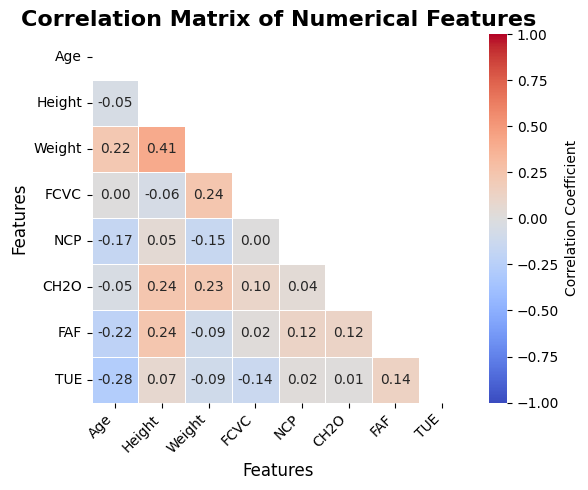

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = X_train_encoded[numerical_features].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"size": 10},  
    mask=mask, 
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0, ha="right")

plt.tight_layout()
plt.show()

Καταλήγουμε στο συμπέρασμα ότι δεν μπορούμε να διαγράψουμε δεδομένα 

### Παράδειγμα υλοποίησης PCA

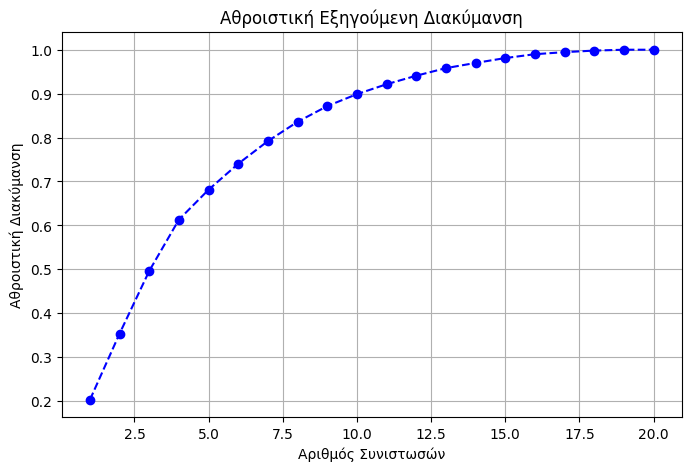

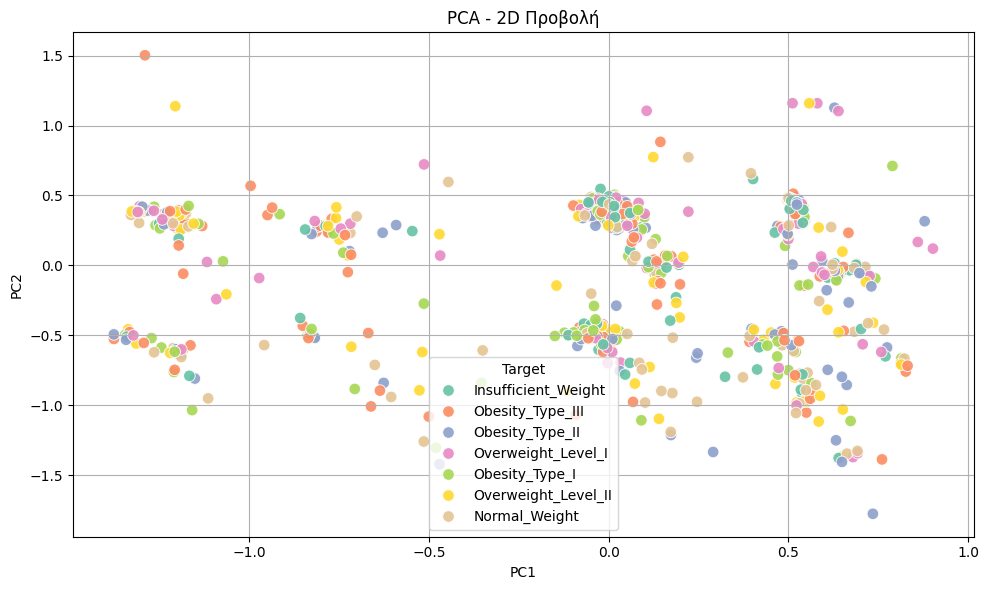

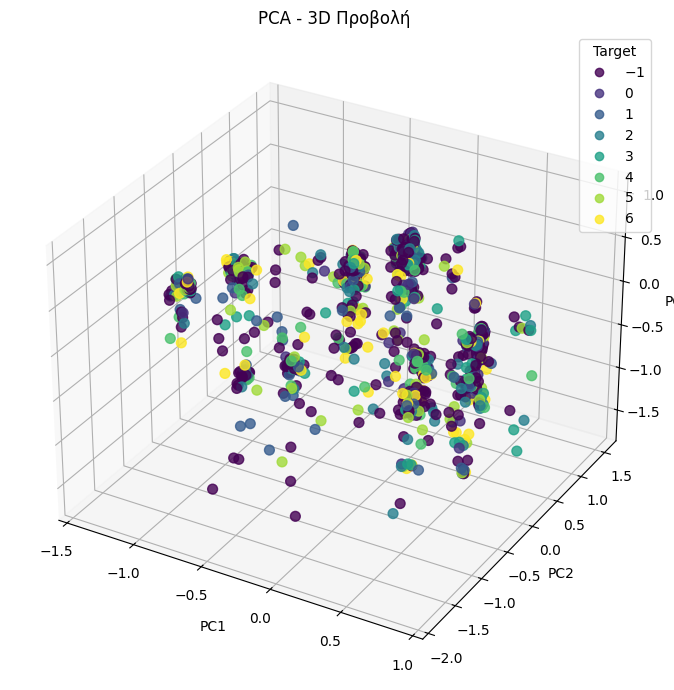

In [26]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_train_encoded)

explained_var = pca_full.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), cum_explained_var, marker='o', linestyle='--', color='b')
plt.title('Αθροιστική Εξηγούμενη Διακύμανση')
plt.xlabel('Αριθμός Συνιστωσών')
plt.ylabel('Αθροιστική Διακύμανση')
plt.grid(True)
plt.show()

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_encoded)

df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Target'] = y_train

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Target', palette='Set2', s=70, alpha=0.9)
plt.title('PCA - 2D Προβολή')
plt.grid(True)
plt.tight_layout()
plt.show()

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_encoded)

df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Target'] = y_train

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
                     c=pd.factorize(df_pca_3d['Target'])[0], cmap='viridis', s=50, alpha=0.8)

ax.set_title('PCA - 3D Προβολή')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Target")
plt.tight_layout()
plt.show()

### Αποθηκεύουμε τα αρχεία

In [27]:
X_train_encoded.to_csv("../CSV_Files/X_train.csv", index=False)
y_train.to_csv("../CSV_Files/y_train.csv", index=False)

X_val_encoded.to_csv("../CSV_Files/X_val.csv", index=False)
y_val.to_csv("../CSV_Files/y_val.csv", index=False)

X_test_encoded.to_csv("../CSV_Files/X_test.csv", index=False)
y_test.to_csv("../CSV_Files/y_test.csv", index=False)

In [28]:
X_test_before_stand.to_csv("../CSV_Files/X_test_before_stand.csv", index=False)
X_train_before_stand.to_csv("../CSV_Files/X_train_before_stand.csv", index=False)
X_val_before_stand.to_csv("../CSV_Files/X_val_before_stand.csv", index=False)